## YOLO Algortihm with Custom Data Training

In [3]:
from ultralytics import YOLO
import cv2
import math

In [4]:
import torch

# Example list of Tensors
tensor_list = [torch.randn(3, 4), torch.randn(3, 4)]

if len(tensor_list) > 0:
    try:
        concatenated_tensor = torch.cat(tensor_list, dim=0)  # Concatenate along dimension 0
        # Proceed with further operations using the concatenated_tensor

    except RuntimeError as e:
        # Handle the specific error if needed
        print(f"Error occurred: {e}")

else:
    print("List of Tensors is empty, cannot concatenate.")

In [8]:

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
model.train(data="/home/arj/TriSem3/Deep-learning/Lab/Lab 8/yolo.yaml", epochs=5)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.2.1 🚀 Python-3.12.1 torch-2.2.0+cu121 CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/arj/TriSem3/Deep-learning/Lab/Lab 8/yolo.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

RuntimeError: Dataset '/home/arj/TriSem3/Deep-learning/Lab/Lab 8/yolo.yaml' error ❌ 
Dataset '/home/arj/TriSem3/Deep-learning/Lab/Lab 8/yolo.yaml' images not found ⚠️, missing path '/home/arj/TriSem3/Deep-learning/Lab/Lab 8/datasets/D:/dataset for lab programs/YOLO Dataset/images/train'
Note dataset download directory is '/home/arj/TriSem3/Deep-learning/Lab/Lab 8/datasets'. You can update this in '/home/arj/.config/Ultralytics/settings.yaml'


0: 640x640 2 persons, 8 cars, 1 truck, 412.7ms
Speed: 15.4ms preprocess, 412.7ms inference, 2285.4ms postprocess per image at shape (1, 3, 640, 640)
Confidence ---> 0.89
Class name --> car
Confidence ---> 0.83
Class name --> car
Confidence ---> 0.79
Class name --> person
Confidence ---> 0.72
Class name --> car
Confidence ---> 0.7
Class name --> truck
Confidence ---> 0.65
Class name --> car
Confidence ---> 0.64
Class name --> car
Confidence ---> 0.58
Class name --> person
Confidence ---> 0.46
Class name --> car
Confidence ---> 0.37
Class name --> car
Confidence ---> 0.33
Class name --> car


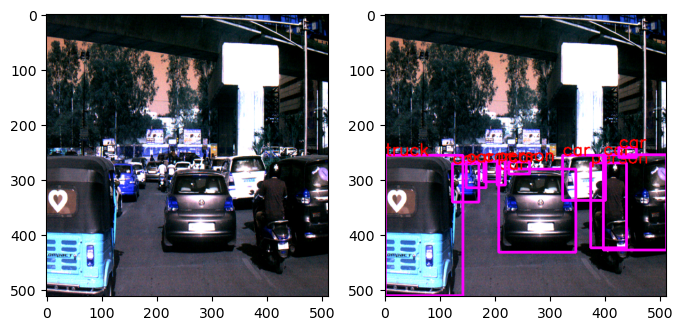

In [7]:
import cv2
import math
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as pt
with open("/home/arj/TriSem3/Deep-learning/Lab/Lab 8/yolo.yaml", "r") as file:
    config = yaml.safe_load(file)
img = cv2.imread(r"/home/arj/TriSem3/ResearchProject/IDD_RESIZED/image_archive/Image_2.png")
fig, ax = pt.subplots(nrows=1, ncols=2, figsize=(8,8))
ax[0].imshow(img)
model = YOLO("yolov8n.pt")
classNames = config['names']
results = model(img)
# Coordinates
for r in results:
    boxes = r.boxes
    for box in boxes:
        # Bounding box
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to int values
        # Put box in image
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)
        # Confidence
        confidence = math.ceil((box.conf[0] * 100)) / 100
        print("Confidence --->", confidence)
        # Class name
        cls = int(box.cls[0])
        class_name = classNames[cls] if 0 <= cls < len(classNames) else "Unknown"
        print("Class name -->", class_name)
        # Object details
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        cv2.putText(img, class_name, org, font, fontScale, color, thickness)
ax[1].imshow(img);